# Dataset: California Housing Prices

O desafio consiste em predizer o preço da habitação a partir de informações do senso de California de 1990.

As colunas do dataset são as seguintes:
- **longitude**: Longitude geográfica.
- **latitude**: Latitude geográfica.
- **housing_median_age**: Idade média das habitações na região, medida em anos.
- **total_rooms**: Número total de cômodos em todas as unidades habitacionais da área analisada.
- **total_bedrooms**: Número total de quartos em todas as unidades habitacionais da área analisada.
- **population**: População total residente na área geográfica correspondente ao imóvel.
- **households**: Número total de domicílios na região, representando unidades familiares ou habitacionais.
- **median_income**: Renda mediana dos moradores da região, expressa em múltiplos de 1.000 dólares.
- **median_house_value**: Valor mediano das residências na área, representado em dólares.
- **ocean_proximity**: Proximidade da localização em relação ao oceano, categorizada por rótulos como "Perto da Baía" (Near Bay), "Perto do Oceano" (Near Ocean), "Interior" (Inland), entre outros.

O candidato deve apresentar um modelo que faça a predição do preço da habitação (o candidato é livre para entregar mais de um modelo).

Esse arquivo é um template para desenvolver o modelo, sinta-se a vontade para modificá-lo como preferir.

In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import random

# Para reprodutibilidade use uma seed específica para gerar números aleatórios
Abaixo algumas formas de definir a seed aleatória de alguns frameworks populares, caso não vá usar algum sinta-se a vontade para excluir

In [2]:
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
torch.manual_seed(random_seed)
#tf.random.set_seed(random_seed)

In [3]:
data = pd.read_csv('housing.csv')

# Análise e visualização dos dados
Espaço reservado para uma análise mais a fundo dos dados e para apresentação de alguns plots caso o candidato julgue necessário

In [4]:
pass

# Pré-processamento

In [5]:
def data_preprocessing(data):
    data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].mean())
    data = pd.get_dummies(data, columns=["ocean_proximity"], drop_first=True)
    scaler = StandardScaler()
    data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return data

data = data_preprocessing(data)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,-0.681889,-0.015566,2.830742,-0.384466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,-1.115804,1.466514,-0.015566,-0.353264,-0.384466
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,-1.124470,1.466514,-0.015566,-0.353264,-0.384466
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,-0.992746,1.466514,-0.015566,-0.353264,-0.384466
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,-1.058608,1.466514,-0.015566,-0.353264,-0.384466


# Separar os dados em treino, validação e teste

In [6]:
from sklearn.model_selection import train_test_split
X = data.drop(columns="median_house_value")
y = data["median_house_value"]

X = torch.from_numpy(X.values).type(torch.float)
y = torch.from_numpy(y.values).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=random_seed)

In [7]:
len(X_train), len(y_train), len(X_test), len(y_test)

(16512, 16512, 4128, 4128)

# Exemplo de estrutura para utilização com o PyTorch
não é obrigatória a utilização do PyTorch. Implementação do modelo pode ser feita com qualquer biblioteca/framework de sua escolha.

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Modelo(nn.Module):
    def __init__(self,
                 input_features: int,
                 hidden_units: int,
                 output_features):
        """Define um modelo de regressão e inicializa seus hiperparâmetros

        Args:
          input_features (int): Número de atributos de entrada do modelo
          hidden_units (int): Número de neurônios das camadas ocultas
          output_features (int): Número de atributos de saída
        """
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x):
        return self.linear_stack(x)

model_1 = Modelo(input_features=12,
                 hidden_units=7,
                 output_features=1)

In [9]:
# Definição das funções de loss e optimizer
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.1)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([16512, 12]),
 torch.Size([16512]),
 torch.Size([4128, 12]),
 torch.Size([4128]))

In [11]:
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

epochs = 100

# Loop de Treino e Teste
for epoch in range(epochs):
  # Treino
  model_1.train()

  y_pred = model_1(X_train).squeeze()

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Teste
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test).squeeze()
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 1.12128 | Test loss: 0.88548
Epoch: 10 | Loss: 0.43355 | Test loss: 0.42866
Epoch: 20 | Loss: 0.33527 | Test loss: 0.34143
Epoch: 30 | Loss: 0.30303 | Test loss: 0.31563
Epoch: 40 | Loss: 0.28476 | Test loss: 0.29697
Epoch: 50 | Loss: 0.27546 | Test loss: 0.28500
Epoch: 60 | Loss: 0.27167 | Test loss: 0.28505
Epoch: 70 | Loss: 0.26798 | Test loss: 0.27585
Epoch: 80 | Loss: 0.26270 | Test loss: 0.27237
Epoch: 90 | Loss: 0.25945 | Test loss: 0.27043


In [12]:
# Predições e Métricas

model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test).squeeze()

mse = loss_fn(y_preds, y_test)
rmse = torch.sqrt(mse)

ss_total = torch.sum((y_test - torch.mean(y_test))**2)
ss_residual = torch.sum((y_test - y_preds)**2)
r2 = 1 - (ss_residual / ss_total)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse.item():.2f}")
print(f"R²: {r2.item():.2f}")

MSE: 0.27
RMSE: 0.52
R²: 0.73


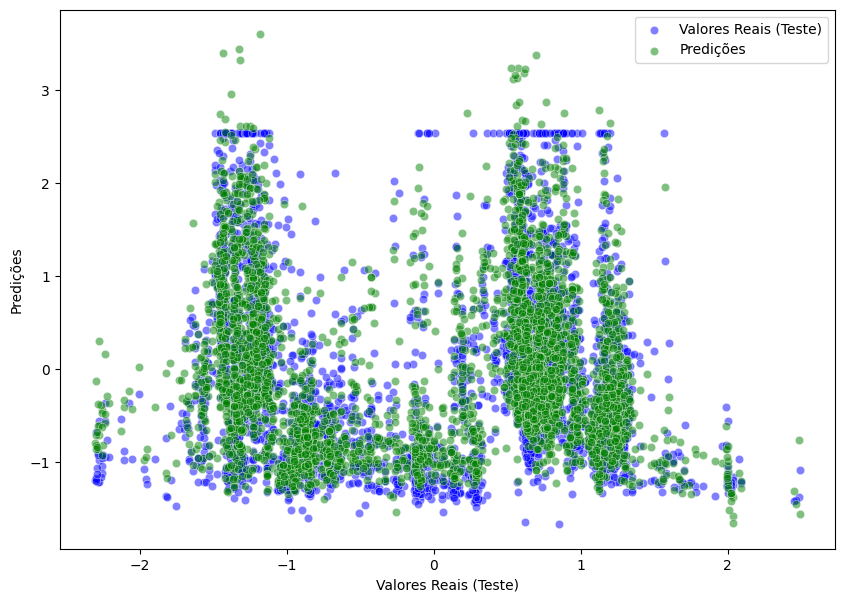

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_test[:, 0], y=y_test, color='blue', label="Valores Reais (Teste)", alpha=0.5)
sns.scatterplot(x=X_test[:, 0], y=y_preds, color='green', label="Predições", alpha=0.5)
plt.xlabel("Valores Reais (Teste)")
plt.ylabel("Predições")
plt.show()